In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [98]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.025
electrical_link = 0.02

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.025, 0.02]

In [182]:
# Инициализация интервала параметра
start_chem= 0.025 # 0.000 # Стартовое значение параметра
finish_chem = -0.05 # Конечное значение параметра
len_chem = 5000 #  Длина интервала параметра
range_chem = range(start_chem, finish_chem, length = len_chem  ) # Интервал параметра

number_transient_points = 10000.0 # Время в течении которого эволюционирует траектория, перед сохранением точек
number_save_points = 1000.0 # Время в течении которого сохраняются точки

idx_control_p = 10 # Индекс управляющего параметра

tstep = 0.01 # Шаг по времени для интегратора
setting_integrate = (alg = Vern9(), adaptive = false, dt = tstep); # Настройки интегратора

# Сечение Пуанкаре
idx_fix_var = 2 # Индекс фиксируемой переменной
val_fix = 0.0 # Значение фиксируемой переменной
surface = (idx_fix_var, val_fix) # Инициализация сечения Пуанкаре
setting_root = (xrtol = 1e-11, atol = 1e-11) # Настройки Для сечения Пуанкаре

(xrtol = 1.0e-11, atol = 1.0e-11)

In [183]:
idx_save_var = 1 # Индекс сохраняемой переменной
x_1 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = 0.025
parameter = 0.02498499699939988
parameter = 0.02496999399879976
parameter = 0.02495499099819964
parameter = 0.02493998799759952
parameter = 0.0249249849969994
parameter = 0.02490998199639928
parameter = 0.02489497899579916
parameter = 0.02487997599519904
parameter = 0.02486497299459892
parameter = 0.0248499699939988
parameter = 0.02483496699339868
parameter = 0.02481996399279856
parameter = 0.02480496099219844
parameter = 0.02478995799159832
parameter = 0.0247749549909982
parameter = 0.02475995199039808
parameter = 0.024744948989797958
parameter = 0.024729945989197838
parameter = 0.02471494298859772
parameter = 0.0246999399879976
parameter = 0.02468493698739748
parameter = 0.02466993398679736
parameter = 0.02465493098619724
parameter = 0.02463992798559712
parameter = 0.024624924984997
parameter = 0.02460992198439688
parameter = 0.02459491898379676
parameter = 0.02457991598319664
parameter = 0.02456491298259652
parameter = 0.0245499099819964
parameter = 0.0245349069813

parameter = 0.021219243848769755
parameter = 0.021204240848169634
parameter = 0.021189237847569514
parameter = 0.021174234846969394
parameter = 0.021159231846369274
parameter = 0.021144228845769154
parameter = 0.021129225845169033
parameter = 0.021114222844568913
parameter = 0.021099219843968793
parameter = 0.021084216843368673
parameter = 0.021069213842768553
parameter = 0.021054210842168432
parameter = 0.021039207841568312
parameter = 0.021024204840968192
parameter = 0.021009201840368072
parameter = 0.020994198839767955
parameter = 0.020979195839167835
parameter = 0.020964192838567715
parameter = 0.020949189837967595
parameter = 0.020934186837367474
parameter = 0.020919183836767354
parameter = 0.020904180836167234
parameter = 0.020889177835567114
parameter = 0.020874174834966994
parameter = 0.020859171834366873
parameter = 0.020844168833766753
parameter = 0.020829165833166633
parameter = 0.020814162832566513
parameter = 0.020799159831966393
parameter = 0.020784156831366273
parameter 

parameter = 0.017423484696939388
parameter = 0.017408481696339267
parameter = 0.017393478695739147
parameter = 0.017378475695139027
parameter = 0.017363472694538907
parameter = 0.017348469693938787
parameter = 0.017333466693338666
parameter = 0.017318463692738546
parameter = 0.017303460692138426
parameter = 0.01728845769153831
parameter = 0.01727345469093819
parameter = 0.01725845169033807
parameter = 0.01724344868973795
parameter = 0.01722844568913783
parameter = 0.01721344268853771
parameter = 0.017198439687937588
parameter = 0.017183436687337468
parameter = 0.017168433686737348
parameter = 0.017153430686137228
parameter = 0.017138427685537107
parameter = 0.017123424684936987
parameter = 0.017108421684336867
parameter = 0.017093418683736747
parameter = 0.017078415683136627
parameter = 0.017063412682536507
parameter = 0.017048409681936386
parameter = 0.017033406681336266
parameter = 0.017018403680736146
parameter = 0.017003400680136026
parameter = 0.016988397679535906
parameter = 0.01

parameter = 0.013702740548109622
parameter = 0.013687737547509501
parameter = 0.013672734546909381
parameter = 0.013657731546309261
parameter = 0.013642728545709143
parameter = 0.013627725545109022
parameter = 0.013612722544508902
parameter = 0.013597719543908782
parameter = 0.013582716543308662
parameter = 0.013567713542708542
parameter = 0.013552710542108421
parameter = 0.013537707541508301
parameter = 0.013522704540908181
parameter = 0.013507701540308061
parameter = 0.013492698539707942
parameter = 0.013477695539107822
parameter = 0.013462692538507702
parameter = 0.013447689537907582
parameter = 0.013432686537307462
parameter = 0.013417683536707341
parameter = 0.013402680536107221
parameter = 0.013387677535507101
parameter = 0.013372674534906981
parameter = 0.01335767153430686
parameter = 0.01334266853370674
parameter = 0.013327665533106622
parameter = 0.013312662532506502
parameter = 0.013297659531906382
parameter = 0.013282656531306261
parameter = 0.013267653530706141
parameter = 

parameter = 0.009936987397479495
parameter = 0.009921984396879377
parameter = 0.009906981396279256
parameter = 0.009891978395679136
parameter = 0.009876975395079016
parameter = 0.009861972394478896
parameter = 0.009846969393878776
parameter = 0.009831966393278655
parameter = 0.009816963392678535
parameter = 0.009801960392078415
parameter = 0.009786957391478295
parameter = 0.009771954390878176
parameter = 0.009756951390278056
parameter = 0.009741948389677936
parameter = 0.009726945389077816
parameter = 0.009711942388477696
parameter = 0.009696939387877575
parameter = 0.009681936387277455
parameter = 0.009666933386677335
parameter = 0.009651930386077215
parameter = 0.009636927385477095
parameter = 0.009621924384876976
parameter = 0.009606921384276856
parameter = 0.009591918383676736
parameter = 0.009576915383076616
parameter = 0.009561912382476495
parameter = 0.009546909381876375
parameter = 0.009531906381276255
parameter = 0.009516903380676135
parameter = 0.009501900380076015
parameter 

parameter = 0.00621624324864973
parameter = 0.00620124024804961
parameter = 0.0061862372474494895
parameter = 0.00617123424684937
parameter = 0.00615623124624925
parameter = 0.00614122824564913
parameter = 0.00612622524504901
parameter = 0.0061112222444488894
parameter = 0.00609621924384877
parameter = 0.00608121624324865
parameter = 0.00606621324264853
parameter = 0.0060512102420484095
parameter = 0.006036207241448289
parameter = 0.00602120424084817
parameter = 0.00600620124024805
parameter = 0.00599119823964793
parameter = 0.0059761952390478094
parameter = 0.005961192238447689
parameter = 0.00594618923784757
parameter = 0.00593118623724745
parameter = 0.0059161832366473295
parameter = 0.005901180236047209
parameter = 0.005886177235447089
parameter = 0.005871174234846969
parameter = 0.00585617123424685
parameter = 0.0058411682336467294
parameter = 0.005826165233046609
parameter = 0.005811162232446489
parameter = 0.005796159231846369
parameter = 0.0057811562312462495
parameter = 0.0057

parameter = 0.002525505101020204
parameter = 0.002510502100420084
parameter = 0.002495499099819964
parameter = 0.002480496099219844
parameter = 0.002465493098619724
parameter = 0.0024504900980196038
parameter = 0.002435487097419484
parameter = 0.002420484096819364
parameter = 0.002405481096219244
parameter = 0.002390478095619124
parameter = 0.0023754750950190037
parameter = 0.002360472094418884
parameter = 0.0023454690938187637
parameter = 0.0023304660932186435
parameter = 0.0023154630926185238
parameter = 0.0023004600920184036
parameter = 0.002285457091418284
parameter = 0.0022704540908181636
parameter = 0.0022554510902180434
parameter = 0.0022404480896179237
parameter = 0.0022254450890178035
parameter = 0.0022104420884176837
parameter = 0.0021954390878175635
parameter = 0.0021804360872174433
parameter = 0.0021654330866173236
parameter = 0.0021504300860172034
parameter = 0.002135427085417083
parameter = 0.0021204240848169634
parameter = 0.0021054210842168432
parameter = 0.002090418083

parameter = -0.0010602120424084817
parameter = -0.0010752150430086017
parameter = -0.0010902180436087217
parameter = -0.0011052210442088419
parameter = -0.0011202240448089618
parameter = -0.0011352270454090818
parameter = -0.0011502300460092018
parameter = -0.0011652330466093218
parameter = -0.001180236047209442
parameter = -0.001195239047809562
parameter = -0.001210242048409682
parameter = -0.0012252450490098019
parameter = -0.001240248049609922
parameter = -0.001255251050210042
parameter = -0.001270254050810162
parameter = -0.001285257051410282
parameter = -0.001300260052010402
parameter = -0.0013152630526105222
parameter = -0.0013302660532106421
parameter = -0.0013452690538107621
parameter = -0.001360272054410882
parameter = -0.0013752750550110023
parameter = -0.0013902780556111223
parameter = -0.0014052810562112422
parameter = -0.0014202840568113622
parameter = -0.0014352870574114824
parameter = -0.0014502900580116024
parameter = -0.0014652930586117224
parameter = -0.00148029605921

parameter = -0.0046309261852370475
parameter = -0.004645929185837168
parameter = -0.004660932186437287
parameter = -0.004675935187037407
parameter = -0.0046909381876375274
parameter = -0.004705941188237648
parameter = -0.004720944188837768
parameter = -0.004735947189437887
parameter = -0.004750950190038007
parameter = -0.0047659531906381275
parameter = -0.004780956191238248
parameter = -0.004795959191838368
parameter = -0.004810962192438488
parameter = -0.0048259651930386074
parameter = -0.004840968193638728
parameter = -0.004855971194238848
parameter = -0.004870974194838968
parameter = -0.004885977195439088
parameter = -0.0049009801960392075
parameter = -0.004915983196639328
parameter = -0.004930986197239448
parameter = -0.004945989197839568
parameter = -0.004960992198439688
parameter = -0.004975995199039808
parameter = -0.004990998199639928
parameter = -0.005006001200240048
parameter = -0.005021004200840168
parameter = -0.005036007201440288
parameter = -0.005051010202040408
parameter

parameter = -0.008246649329865973
parameter = -0.008261652330466093
parameter = -0.008276655331066213
parameter = -0.008291658331666334
parameter = -0.008306661332266454
parameter = -0.008321664332866574
parameter = -0.008336667333466692
parameter = -0.008351670334066813
parameter = -0.008366673334666933
parameter = -0.008381676335267053
parameter = -0.008396679335867173
parameter = -0.008411682336467293
parameter = -0.008426685337067414
parameter = -0.008441688337667534
parameter = -0.008456691338267654
parameter = -0.008471694338867774
parameter = -0.008486697339467894
parameter = -0.008501700340068013
parameter = -0.008516703340668133
parameter = -0.008531706341268253
parameter = -0.008546709341868373
parameter = -0.008561712342468494
parameter = -0.008576715343068614
parameter = -0.008591718343668734
parameter = -0.008606721344268854
parameter = -0.008621724344868974
parameter = -0.008636727345469095
parameter = -0.008651730346069213
parameter = -0.008666733346669333
parameter = -0

parameter = -0.0118623724744949
parameter = -0.01187737547509502
parameter = -0.01189237847569514
parameter = -0.011907381476295258
parameter = -0.011922384476895379
parameter = -0.011937387477495499
parameter = -0.011952390478095619
parameter = -0.011967393478695739
parameter = -0.01198239647929586
parameter = -0.01199739947989598
parameter = -0.0120124024804961
parameter = -0.01202740548109622
parameter = -0.01204240848169634
parameter = -0.012057411482296458
parameter = -0.012072414482896579
parameter = -0.012087417483496699
parameter = -0.012102420484096819
parameter = -0.01211742348469694
parameter = -0.01213242648529706
parameter = -0.01214742948589718
parameter = -0.0121624324864973
parameter = -0.01217743548709742
parameter = -0.01219243848769754
parameter = -0.012207441488297659
parameter = -0.012222444488897779
parameter = -0.012237447489497899
parameter = -0.01225245049009802
parameter = -0.01226745349069814
parameter = -0.01228245649129826
parameter = -0.01229745949189838
p

parameter = -0.015523104620924185
parameter = -0.015538107621524305
parameter = -0.015553110622124425
parameter = -0.015568113622724545
parameter = -0.015583116623324665
parameter = -0.015598119623924786
parameter = -0.015613122624524904
parameter = -0.015628125625125024
parameter = -0.015643128625725145
parameter = -0.015658131626325265
parameter = -0.015673134626925385
parameter = -0.015688137627525505
parameter = -0.015703140628125625
parameter = -0.015718143628725745
parameter = -0.015733146629325866
parameter = -0.015748149629925986
parameter = -0.015763152630526106
parameter = -0.015778155631126226
parameter = -0.015793158631726346
parameter = -0.015808161632326467
parameter = -0.015823164632926587
parameter = -0.015838167633526707
parameter = -0.015853170634126824
parameter = -0.015868173634726944
parameter = -0.015883176635327064
parameter = -0.015898179635927184
parameter = -0.015913182636527304
parameter = -0.015928185637127425
parameter = -0.015943188637727545
parameter = -0

parameter = -0.01916883376675335
parameter = -0.01918383676735347
parameter = -0.019198839767953592
parameter = -0.019213842768553712
parameter = -0.019228845769153832
parameter = -0.019243848769753952
parameter = -0.01925885177035407
parameter = -0.01927385477095419
parameter = -0.01928885777155431
parameter = -0.01930386077215443
parameter = -0.01931886377275455
parameter = -0.01933386677335467
parameter = -0.01934886977395479
parameter = -0.01936387277455491
parameter = -0.01937887577515503
parameter = -0.01939387877575515
parameter = -0.01940888177635527
parameter = -0.01942388477695539
parameter = -0.01943888777755551
parameter = -0.01945389077815563
parameter = -0.019468893778755752
parameter = -0.019483896779355872
parameter = -0.019498899779955992
parameter = -0.019513902780556112
parameter = -0.019528905781156233
parameter = -0.019543908781756353
parameter = -0.019558911782356473
parameter = -0.01957391478295659
parameter = -0.01958891778355671
parameter = -0.01960392078415683

parameter = -0.022799559911982396
parameter = -0.022814562912582517
parameter = -0.022829565913182637
parameter = -0.022844568913782757
parameter = -0.022859571914382877
parameter = -0.022874574914982997
parameter = -0.022889577915583117
parameter = -0.022904580916183238
parameter = -0.022919583916783358
parameter = -0.022934586917383478
parameter = -0.022949589917983598
parameter = -0.02296459291858372
parameter = -0.022979595919183835
parameter = -0.022994598919783955
parameter = -0.023009601920384076
parameter = -0.023024604920984196
parameter = -0.023039607921584316
parameter = -0.023054610922184436
parameter = -0.023069613922784556
parameter = -0.023084616923384677
parameter = -0.023099619923984797
parameter = -0.023114622924584917
parameter = -0.023129625925185037
parameter = -0.023144628925785157
parameter = -0.023159631926385277
parameter = -0.023174634926985398
parameter = -0.023189637927585518
parameter = -0.023204640928185638
parameter = -0.023219643928785758
parameter = -0.

parameter = -0.026475295059011802
parameter = -0.026490298059611922
parameter = -0.026505301060212042
parameter = -0.026520304060812162
parameter = -0.026535307061412283
parameter = -0.026550310062012403
parameter = -0.026565313062612523
parameter = -0.026580316063212643
parameter = -0.026595319063812763
parameter = -0.026610322064412884
parameter = -0.026625325065013004
parameter = -0.026640328065613124
parameter = -0.026655331066213244
parameter = -0.026670334066813364
parameter = -0.02668533706741348
parameter = -0.0267003400680136
parameter = -0.02671534306861372
parameter = -0.02673034606921384
parameter = -0.026745349069813962
parameter = -0.026760352070414082
parameter = -0.026775355071014202
parameter = -0.026790358071614322
parameter = -0.026805361072214443
parameter = -0.026820364072814563
parameter = -0.026835367073414683
parameter = -0.026850370074014803
parameter = -0.026865373074614923
parameter = -0.026880376075215043
parameter = -0.026895379075815164
parameter = -0.0269

parameter = -0.030091018203640726
parameter = -0.030106021204240847
parameter = -0.030121024204840967
parameter = -0.030136027205441087
parameter = -0.030151030206041207
parameter = -0.030166033206641327
parameter = -0.030181036207241448
parameter = -0.030196039207841568
parameter = -0.030211042208441688
parameter = -0.030226045209041808
parameter = -0.03024104820964193
parameter = -0.03025605121024205
parameter = -0.03027105421084217
parameter = -0.03028605721144229
parameter = -0.03030106021204241
parameter = -0.03031606321264253
parameter = -0.03033106621324265
parameter = -0.03034606921384277
parameter = -0.03036107221444289
parameter = -0.03037607521504301
parameter = -0.03039107821564313
parameter = -0.030406081216243247
parameter = -0.030421084216843367
parameter = -0.030436087217443487
parameter = -0.030451090218043608
parameter = -0.030466093218643728
parameter = -0.030481096219243848
parameter = -0.030496099219843968
parameter = -0.03051110222044409
parameter = -0.03052610522

parameter = -0.03378175635127025
parameter = -0.033796759351870376
parameter = -0.03381176235247049
parameter = -0.033826765353070616
parameter = -0.03384176835367073
parameter = -0.033856771354270856
parameter = -0.03387177435487097
parameter = -0.0338867773554711
parameter = -0.033901780356071214
parameter = -0.03391678335667134
parameter = -0.033931786357271454
parameter = -0.03394678935787158
parameter = -0.033961792358471694
parameter = -0.03397679535907181
parameter = -0.033991798359671935
parameter = -0.03400680136027205
parameter = -0.034021804360872175
parameter = -0.03403680736147229
parameter = -0.034051810362072416
parameter = -0.03406681336267253
parameter = -0.034081816363272656
parameter = -0.03409681936387277
parameter = -0.034111822364472896
parameter = -0.03412682536507301
parameter = -0.03414182836567314
parameter = -0.03415683136627325
parameter = -0.03417183436687338
parameter = -0.034186837367473494
parameter = -0.03420184036807362
parameter = -0.03421684336867373

parameter = -0.0374874974994999
parameter = -0.03750250050010002
parameter = -0.03751750350070014
parameter = -0.03753250650130026
parameter = -0.03754750950190038
parameter = -0.0375625125025005
parameter = -0.03757751550310062
parameter = -0.03759251850370074
parameter = -0.03760752150430086
parameter = -0.03762252450490098
parameter = -0.0376375275055011
parameter = -0.03765253050610122
parameter = -0.037667533506701344
parameter = -0.03768253650730146
parameter = -0.03769753950790158
parameter = -0.0377125425085017
parameter = -0.03772754550910182
parameter = -0.03774254850970194
parameter = -0.03775755151030206
parameter = -0.03777255451090218
parameter = -0.0377875575115023
parameter = -0.03780256051210242
parameter = -0.03781756351270254
parameter = -0.03783256651330266
parameter = -0.03784756951390278
parameter = -0.0378625725145029
parameter = -0.03787757551510302
parameter = -0.03789257851570314
parameter = -0.03790758151630326
parameter = -0.03792258451690338
parameter = -0.

parameter = -0.04117823564712943
parameter = -0.041193238647729544
parameter = -0.04120824164832967
parameter = -0.041223244648929784
parameter = -0.04123824764952991
parameter = -0.041253250650130024
parameter = -0.04126825365073015
parameter = -0.041283256651330265
parameter = -0.04129825965193039
parameter = -0.041313262652530505
parameter = -0.04132826565313063
parameter = -0.041343268653730746
parameter = -0.04135827165433087
parameter = -0.041373274654930986
parameter = -0.04138827765553111
parameter = -0.041403280656131226
parameter = -0.04141828365673134
parameter = -0.04143328665733147
parameter = -0.041448289657931583
parameter = -0.04146329265853171
parameter = -0.041478295659131824
parameter = -0.04149329865973195
parameter = -0.041508301660332064
parameter = -0.04152330466093219
parameter = -0.041538307661532305
parameter = -0.04155331066213243
parameter = -0.041568313662732545
parameter = -0.04158331666333267
parameter = -0.041598319663932785
parameter = -0.04161332266453

parameter = -0.04488397679535907
parameter = -0.04489897979595919
parameter = -0.04491398279655931
parameter = -0.04492898579715943
parameter = -0.04494398879775955
parameter = -0.044958991798359674
parameter = -0.04497399479895979
parameter = -0.044988997799559914
parameter = -0.04500400080016003
parameter = -0.045019003800760155
parameter = -0.04503400680136027
parameter = -0.045049009801960395
parameter = -0.04506401280256051
parameter = -0.045079015803160635
parameter = -0.04509401880376075
parameter = -0.04510902180436087
parameter = -0.04512402480496099
parameter = -0.04513902780556111
parameter = -0.04515403080616123
parameter = -0.04516903380676135
parameter = -0.04518403680736147
parameter = -0.04519903980796159
parameter = -0.045214042808561714
parameter = -0.04522904580916183
parameter = -0.045244048809761954
parameter = -0.04525905181036207
parameter = -0.045274054810962194
parameter = -0.04528905781156231
parameter = -0.045304060812162435
parameter = -0.04531906381276255
p

parameter = -0.04855971194238848
parameter = -0.048574714942988595
parameter = -0.04858971794358872
parameter = -0.048604720944188835
parameter = -0.04861972394478896
parameter = -0.048634726945389076
parameter = -0.0486497299459892
parameter = -0.048664732946589316
parameter = -0.04867973594718944
parameter = -0.048694738947789556
parameter = -0.04870974194838968
parameter = -0.0487247449489898
parameter = -0.04873974794958992
parameter = -0.04875475095019004
parameter = -0.04876975395079016
parameter = -0.04878475695139028
parameter = -0.0487997599519904
parameter = -0.04881476295259052
parameter = -0.048829765953190635
parameter = -0.04884476895379076
parameter = -0.048859771954390875
parameter = -0.048874774954991
parameter = -0.048889777955591115
parameter = -0.04890478095619124
parameter = -0.048919783956791356
parameter = -0.04893478695739148
parameter = -0.048949789957991596
parameter = -0.04896479295859172
parameter = -0.04897979595919184
parameter = -0.04899479895979196
param

In [184]:
idx_save_var = 4 # Индекс сохраняемой переменной
x_2 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = 0.025
parameter = 0.02498499699939988
parameter = 0.02496999399879976
parameter = 0.02495499099819964
parameter = 0.02493998799759952
parameter = 0.0249249849969994
parameter = 0.02490998199639928
parameter = 0.02489497899579916
parameter = 0.02487997599519904
parameter = 0.02486497299459892
parameter = 0.0248499699939988
parameter = 0.02483496699339868
parameter = 0.02481996399279856
parameter = 0.02480496099219844
parameter = 0.02478995799159832
parameter = 0.0247749549909982
parameter = 0.02475995199039808
parameter = 0.024744948989797958
parameter = 0.024729945989197838
parameter = 0.02471494298859772
parameter = 0.0246999399879976
parameter = 0.02468493698739748
parameter = 0.02466993398679736
parameter = 0.02465493098619724
parameter = 0.02463992798559712
parameter = 0.024624924984997
parameter = 0.02460992198439688
parameter = 0.02459491898379676
parameter = 0.02457991598319664
parameter = 0.02456491298259652
parameter = 0.0245499099819964
parameter = 0.0245349069813

parameter = 0.021219243848769755
parameter = 0.021204240848169634
parameter = 0.021189237847569514
parameter = 0.021174234846969394
parameter = 0.021159231846369274
parameter = 0.021144228845769154
parameter = 0.021129225845169033
parameter = 0.021114222844568913
parameter = 0.021099219843968793
parameter = 0.021084216843368673
parameter = 0.021069213842768553
parameter = 0.021054210842168432
parameter = 0.021039207841568312
parameter = 0.021024204840968192
parameter = 0.021009201840368072
parameter = 0.020994198839767955
parameter = 0.020979195839167835
parameter = 0.020964192838567715
parameter = 0.020949189837967595
parameter = 0.020934186837367474
parameter = 0.020919183836767354
parameter = 0.020904180836167234
parameter = 0.020889177835567114
parameter = 0.020874174834966994
parameter = 0.020859171834366873
parameter = 0.020844168833766753
parameter = 0.020829165833166633
parameter = 0.020814162832566513
parameter = 0.020799159831966393
parameter = 0.020784156831366273
parameter 

parameter = 0.017438487697539508
parameter = 0.017423484696939388
parameter = 0.017408481696339267
parameter = 0.017393478695739147
parameter = 0.017378475695139027
parameter = 0.017363472694538907
parameter = 0.017348469693938787
parameter = 0.017333466693338666
parameter = 0.017318463692738546
parameter = 0.017303460692138426
parameter = 0.01728845769153831
parameter = 0.01727345469093819
parameter = 0.01725845169033807
parameter = 0.01724344868973795
parameter = 0.01722844568913783
parameter = 0.01721344268853771
parameter = 0.017198439687937588
parameter = 0.017183436687337468
parameter = 0.017168433686737348
parameter = 0.017153430686137228
parameter = 0.017138427685537107
parameter = 0.017123424684936987
parameter = 0.017108421684336867
parameter = 0.017093418683736747
parameter = 0.017078415683136627
parameter = 0.017063412682536507
parameter = 0.017048409681936386
parameter = 0.017033406681336266
parameter = 0.017018403680736146
parameter = 0.017003400680136026
parameter = 0.01

parameter = 0.013717743548709742
parameter = 0.013702740548109622
parameter = 0.013687737547509501
parameter = 0.013672734546909381
parameter = 0.013657731546309261
parameter = 0.013642728545709143
parameter = 0.013627725545109022
parameter = 0.013612722544508902
parameter = 0.013597719543908782
parameter = 0.013582716543308662
parameter = 0.013567713542708542
parameter = 0.013552710542108421
parameter = 0.013537707541508301
parameter = 0.013522704540908181
parameter = 0.013507701540308061
parameter = 0.013492698539707942
parameter = 0.013477695539107822
parameter = 0.013462692538507702
parameter = 0.013447689537907582
parameter = 0.013432686537307462
parameter = 0.013417683536707341
parameter = 0.013402680536107221
parameter = 0.013387677535507101
parameter = 0.013372674534906981
parameter = 0.01335767153430686
parameter = 0.01334266853370674
parameter = 0.013327665533106622
parameter = 0.013312662532506502
parameter = 0.013297659531906382
parameter = 0.013282656531306261
parameter = 

parameter = 0.009966993398679735
parameter = 0.009951990398079615
parameter = 0.009936987397479495
parameter = 0.009921984396879377
parameter = 0.009906981396279256
parameter = 0.009891978395679136
parameter = 0.009876975395079016
parameter = 0.009861972394478896
parameter = 0.009846969393878776
parameter = 0.009831966393278655
parameter = 0.009816963392678535
parameter = 0.009801960392078415
parameter = 0.009786957391478295
parameter = 0.009771954390878176
parameter = 0.009756951390278056
parameter = 0.009741948389677936
parameter = 0.009726945389077816
parameter = 0.009711942388477696
parameter = 0.009696939387877575
parameter = 0.009681936387277455
parameter = 0.009666933386677335
parameter = 0.009651930386077215
parameter = 0.009636927385477095
parameter = 0.009621924384876976
parameter = 0.009606921384276856
parameter = 0.009591918383676736
parameter = 0.009576915383076616
parameter = 0.009561912382476495
parameter = 0.009546909381876375
parameter = 0.009531906381276255
parameter 

parameter = 0.00623124624924985
parameter = 0.00621624324864973
parameter = 0.00620124024804961
parameter = 0.0061862372474494895
parameter = 0.00617123424684937
parameter = 0.00615623124624925
parameter = 0.00614122824564913
parameter = 0.00612622524504901
parameter = 0.0061112222444488894
parameter = 0.00609621924384877
parameter = 0.00608121624324865
parameter = 0.00606621324264853
parameter = 0.0060512102420484095
parameter = 0.006036207241448289
parameter = 0.00602120424084817
parameter = 0.00600620124024805
parameter = 0.00599119823964793
parameter = 0.0059761952390478094
parameter = 0.005961192238447689
parameter = 0.00594618923784757
parameter = 0.00593118623724745
parameter = 0.0059161832366473295
parameter = 0.005901180236047209
parameter = 0.005886177235447089
parameter = 0.005871174234846969
parameter = 0.00585617123424685
parameter = 0.0058411682336467294
parameter = 0.005826165233046609
parameter = 0.005811162232446489
parameter = 0.005796159231846369
parameter = 0.005781

parameter = 0.002540508101620324
parameter = 0.002525505101020204
parameter = 0.002510502100420084
parameter = 0.002495499099819964
parameter = 0.002480496099219844
parameter = 0.002465493098619724
parameter = 0.0024504900980196038
parameter = 0.002435487097419484
parameter = 0.002420484096819364
parameter = 0.002405481096219244
parameter = 0.002390478095619124
parameter = 0.0023754750950190037
parameter = 0.002360472094418884
parameter = 0.0023454690938187637
parameter = 0.0023304660932186435
parameter = 0.0023154630926185238
parameter = 0.0023004600920184036
parameter = 0.002285457091418284
parameter = 0.0022704540908181636
parameter = 0.0022554510902180434
parameter = 0.0022404480896179237
parameter = 0.0022254450890178035
parameter = 0.0022104420884176837
parameter = 0.0021954390878175635
parameter = 0.0021804360872174433
parameter = 0.0021654330866173236
parameter = 0.0021504300860172034
parameter = 0.002135427085417083
parameter = 0.0021204240848169634
parameter = 0.0021054210842

parameter = -0.0010452090418083617
parameter = -0.0010602120424084817
parameter = -0.0010752150430086017
parameter = -0.0010902180436087217
parameter = -0.0011052210442088419
parameter = -0.0011202240448089618
parameter = -0.0011352270454090818
parameter = -0.0011502300460092018
parameter = -0.0011652330466093218
parameter = -0.001180236047209442
parameter = -0.001195239047809562
parameter = -0.001210242048409682
parameter = -0.0012252450490098019
parameter = -0.001240248049609922
parameter = -0.001255251050210042
parameter = -0.001270254050810162
parameter = -0.001285257051410282
parameter = -0.001300260052010402
parameter = -0.0013152630526105222
parameter = -0.0013302660532106421
parameter = -0.0013452690538107621
parameter = -0.001360272054410882
parameter = -0.0013752750550110023
parameter = -0.0013902780556111223
parameter = -0.0014052810562112422
parameter = -0.0014202840568113622
parameter = -0.0014352870574114824
parameter = -0.0014502900580116024
parameter = -0.00146529305861

parameter = -0.004600920184036807
parameter = -0.004615923184636927
parameter = -0.0046309261852370475
parameter = -0.004645929185837168
parameter = -0.004660932186437287
parameter = -0.004675935187037407
parameter = -0.0046909381876375274
parameter = -0.004705941188237648
parameter = -0.004720944188837768
parameter = -0.004735947189437887
parameter = -0.004750950190038007
parameter = -0.0047659531906381275
parameter = -0.004780956191238248
parameter = -0.004795959191838368
parameter = -0.004810962192438488
parameter = -0.0048259651930386074
parameter = -0.004840968193638728
parameter = -0.004855971194238848
parameter = -0.004870974194838968
parameter = -0.004885977195439088
parameter = -0.0049009801960392075
parameter = -0.004915983196639328
parameter = -0.004930986197239448
parameter = -0.004945989197839568
parameter = -0.004960992198439688
parameter = -0.004975995199039808
parameter = -0.004990998199639928
parameter = -0.005006001200240048
parameter = -0.005021004200840168
parameter

parameter = -0.008231646329265853
parameter = -0.008246649329865973
parameter = -0.008261652330466093
parameter = -0.008276655331066213
parameter = -0.008291658331666334
parameter = -0.008306661332266454
parameter = -0.008321664332866574
parameter = -0.008336667333466692
parameter = -0.008351670334066813
parameter = -0.008366673334666933
parameter = -0.008381676335267053
parameter = -0.008396679335867173
parameter = -0.008411682336467293
parameter = -0.008426685337067414
parameter = -0.008441688337667534
parameter = -0.008456691338267654
parameter = -0.008471694338867774
parameter = -0.008486697339467894
parameter = -0.008501700340068013
parameter = -0.008516703340668133
parameter = -0.008531706341268253
parameter = -0.008546709341868373
parameter = -0.008561712342468494
parameter = -0.008576715343068614
parameter = -0.008591718343668734
parameter = -0.008606721344268854
parameter = -0.008621724344868974
parameter = -0.008636727345469095
parameter = -0.008651730346069213
parameter = -0

parameter = -0.0118623724744949
parameter = -0.01187737547509502
parameter = -0.01189237847569514
parameter = -0.011907381476295258
parameter = -0.011922384476895379
parameter = -0.011937387477495499
parameter = -0.011952390478095619
parameter = -0.011967393478695739
parameter = -0.01198239647929586
parameter = -0.01199739947989598
parameter = -0.0120124024804961
parameter = -0.01202740548109622
parameter = -0.01204240848169634
parameter = -0.012057411482296458
parameter = -0.012072414482896579
parameter = -0.012087417483496699
parameter = -0.012102420484096819
parameter = -0.01211742348469694
parameter = -0.01213242648529706
parameter = -0.01214742948589718
parameter = -0.0121624324864973
parameter = -0.01217743548709742
parameter = -0.01219243848769754
parameter = -0.012207441488297659
parameter = -0.012222444488897779
parameter = -0.012237447489497899
parameter = -0.01225245049009802
parameter = -0.01226745349069814
parameter = -0.01228245649129826
parameter = -0.01229745949189838
p

parameter = -0.015523104620924185
parameter = -0.015538107621524305
parameter = -0.015553110622124425
parameter = -0.015568113622724545
parameter = -0.015583116623324665
parameter = -0.015598119623924786
parameter = -0.015613122624524904
parameter = -0.015628125625125024
parameter = -0.015643128625725145
parameter = -0.015658131626325265
parameter = -0.015673134626925385
parameter = -0.015688137627525505
parameter = -0.015703140628125625
parameter = -0.015718143628725745
parameter = -0.015733146629325866
parameter = -0.015748149629925986
parameter = -0.015763152630526106
parameter = -0.015778155631126226
parameter = -0.015793158631726346
parameter = -0.015808161632326467
parameter = -0.015823164632926587
parameter = -0.015838167633526707
parameter = -0.015853170634126824
parameter = -0.015868173634726944
parameter = -0.015883176635327064
parameter = -0.015898179635927184
parameter = -0.015913182636527304
parameter = -0.015928185637127425
parameter = -0.015943188637727545
parameter = -0

parameter = -0.01916883376675335
parameter = -0.01918383676735347
parameter = -0.019198839767953592
parameter = -0.019213842768553712
parameter = -0.019228845769153832
parameter = -0.019243848769753952
parameter = -0.01925885177035407
parameter = -0.01927385477095419
parameter = -0.01928885777155431
parameter = -0.01930386077215443
parameter = -0.01931886377275455
parameter = -0.01933386677335467
parameter = -0.01934886977395479
parameter = -0.01936387277455491
parameter = -0.01937887577515503
parameter = -0.01939387877575515
parameter = -0.01940888177635527
parameter = -0.01942388477695539
parameter = -0.01943888777755551
parameter = -0.01945389077815563
parameter = -0.019468893778755752
parameter = -0.019483896779355872
parameter = -0.019498899779955992
parameter = -0.019513902780556112
parameter = -0.019528905781156233
parameter = -0.019543908781756353
parameter = -0.019558911782356473
parameter = -0.01957391478295659
parameter = -0.01958891778355671
parameter = -0.01960392078415683

parameter = -0.022814562912582517
parameter = -0.022829565913182637
parameter = -0.022844568913782757
parameter = -0.022859571914382877
parameter = -0.022874574914982997
parameter = -0.022889577915583117
parameter = -0.022904580916183238
parameter = -0.022919583916783358
parameter = -0.022934586917383478
parameter = -0.022949589917983598
parameter = -0.02296459291858372
parameter = -0.022979595919183835
parameter = -0.022994598919783955
parameter = -0.023009601920384076
parameter = -0.023024604920984196
parameter = -0.023039607921584316
parameter = -0.023054610922184436
parameter = -0.023069613922784556
parameter = -0.023084616923384677
parameter = -0.023099619923984797
parameter = -0.023114622924584917
parameter = -0.023129625925185037
parameter = -0.023144628925785157
parameter = -0.023159631926385277
parameter = -0.023174634926985398
parameter = -0.023189637927585518
parameter = -0.023204640928185638
parameter = -0.023219643928785758
parameter = -0.02323464692938588
parameter = -0.0

parameter = -0.026505301060212042
parameter = -0.026520304060812162
parameter = -0.026535307061412283
parameter = -0.026550310062012403
parameter = -0.026565313062612523
parameter = -0.026580316063212643
parameter = -0.026595319063812763
parameter = -0.026610322064412884
parameter = -0.026625325065013004
parameter = -0.026640328065613124
parameter = -0.026655331066213244
parameter = -0.026670334066813364
parameter = -0.02668533706741348
parameter = -0.0267003400680136
parameter = -0.02671534306861372
parameter = -0.02673034606921384
parameter = -0.026745349069813962
parameter = -0.026760352070414082
parameter = -0.026775355071014202
parameter = -0.026790358071614322
parameter = -0.026805361072214443
parameter = -0.026820364072814563
parameter = -0.026835367073414683
parameter = -0.026850370074014803
parameter = -0.026865373074614923
parameter = -0.026880376075215043
parameter = -0.026895379075815164
parameter = -0.026910382076415284
parameter = -0.026925385077015404
parameter = -0.0269

parameter = -0.030121024204840967
parameter = -0.030136027205441087
parameter = -0.030151030206041207
parameter = -0.030166033206641327
parameter = -0.030181036207241448
parameter = -0.030196039207841568
parameter = -0.030211042208441688
parameter = -0.030226045209041808
parameter = -0.03024104820964193
parameter = -0.03025605121024205
parameter = -0.03027105421084217
parameter = -0.03028605721144229
parameter = -0.03030106021204241
parameter = -0.03031606321264253
parameter = -0.03033106621324265
parameter = -0.03034606921384277
parameter = -0.03036107221444289
parameter = -0.03037607521504301
parameter = -0.03039107821564313
parameter = -0.030406081216243247
parameter = -0.030421084216843367
parameter = -0.030436087217443487
parameter = -0.030451090218043608
parameter = -0.030466093218643728
parameter = -0.030481096219243848
parameter = -0.030496099219843968
parameter = -0.03051110222044409
parameter = -0.03052610522104421
parameter = -0.03054110822164433
parameter = -0.0305561112222

parameter = -0.033826765353070616
parameter = -0.03384176835367073
parameter = -0.033856771354270856
parameter = -0.03387177435487097
parameter = -0.0338867773554711
parameter = -0.033901780356071214
parameter = -0.03391678335667134
parameter = -0.033931786357271454
parameter = -0.03394678935787158
parameter = -0.033961792358471694
parameter = -0.03397679535907181
parameter = -0.033991798359671935
parameter = -0.03400680136027205
parameter = -0.034021804360872175
parameter = -0.03403680736147229
parameter = -0.034051810362072416
parameter = -0.03406681336267253
parameter = -0.034081816363272656
parameter = -0.03409681936387277
parameter = -0.034111822364472896
parameter = -0.03412682536507301
parameter = -0.03414182836567314
parameter = -0.03415683136627325
parameter = -0.03417183436687338
parameter = -0.034186837367473494
parameter = -0.03420184036807362
parameter = -0.034216843368673734
parameter = -0.03423184636927386
parameter = -0.034246849369873975
parameter = -0.0342618523704741

parameter = -0.03751750350070014
parameter = -0.03753250650130026
parameter = -0.03754750950190038
parameter = -0.0375625125025005
parameter = -0.03757751550310062
parameter = -0.03759251850370074
parameter = -0.03760752150430086
parameter = -0.03762252450490098
parameter = -0.0376375275055011
parameter = -0.03765253050610122
parameter = -0.037667533506701344
parameter = -0.03768253650730146
parameter = -0.03769753950790158
parameter = -0.0377125425085017
parameter = -0.03772754550910182
parameter = -0.03774254850970194
parameter = -0.03775755151030206
parameter = -0.03777255451090218
parameter = -0.0377875575115023
parameter = -0.03780256051210242
parameter = -0.03781756351270254
parameter = -0.03783256651330266
parameter = -0.03784756951390278
parameter = -0.0378625725145029
parameter = -0.03787757551510302
parameter = -0.03789257851570314
parameter = -0.03790758151630326
parameter = -0.03792258451690338
parameter = -0.0379375875175035
parameter = -0.037952590518103624
parameter = -0

parameter = -0.041223244648929784
parameter = -0.04123824764952991
parameter = -0.041253250650130024
parameter = -0.04126825365073015
parameter = -0.041283256651330265
parameter = -0.04129825965193039
parameter = -0.041313262652530505
parameter = -0.04132826565313063
parameter = -0.041343268653730746
parameter = -0.04135827165433087
parameter = -0.041373274654930986
parameter = -0.04138827765553111
parameter = -0.041403280656131226
parameter = -0.04141828365673134
parameter = -0.04143328665733147
parameter = -0.041448289657931583
parameter = -0.04146329265853171
parameter = -0.041478295659131824
parameter = -0.04149329865973195
parameter = -0.041508301660332064
parameter = -0.04152330466093219
parameter = -0.041538307661532305
parameter = -0.04155331066213243
parameter = -0.041568313662732545
parameter = -0.04158331666333267
parameter = -0.041598319663932785
parameter = -0.04161332266453291
parameter = -0.041628325665133026
parameter = -0.04164332866573315
parameter = -0.04165833166633

parameter = -0.04492898579715943
parameter = -0.04494398879775955
parameter = -0.044958991798359674
parameter = -0.04497399479895979
parameter = -0.044988997799559914
parameter = -0.04500400080016003
parameter = -0.045019003800760155
parameter = -0.04503400680136027
parameter = -0.045049009801960395
parameter = -0.04506401280256051
parameter = -0.045079015803160635
parameter = -0.04509401880376075
parameter = -0.04510902180436087
parameter = -0.04512402480496099
parameter = -0.04513902780556111
parameter = -0.04515403080616123
parameter = -0.04516903380676135
parameter = -0.04518403680736147
parameter = -0.04519903980796159
parameter = -0.045214042808561714
parameter = -0.04522904580916183
parameter = -0.045244048809761954
parameter = -0.04525905181036207
parameter = -0.045274054810962194
parameter = -0.04528905781156231
parameter = -0.045304060812162435
parameter = -0.04531906381276255
parameter = -0.045334066813362675
parameter = -0.04534906981396279
parameter = -0.045364072814562915

parameter = -0.048604720944188835
parameter = -0.04861972394478896
parameter = -0.048634726945389076
parameter = -0.0486497299459892
parameter = -0.048664732946589316
parameter = -0.04867973594718944
parameter = -0.048694738947789556
parameter = -0.04870974194838968
parameter = -0.0487247449489898
parameter = -0.04873974794958992
parameter = -0.04875475095019004
parameter = -0.04876975395079016
parameter = -0.04878475695139028
parameter = -0.0487997599519904
parameter = -0.04881476295259052
parameter = -0.048829765953190635
parameter = -0.04884476895379076
parameter = -0.048859771954390875
parameter = -0.048874774954991
parameter = -0.048889777955591115
parameter = -0.04890478095619124
parameter = -0.048919783956791356
parameter = -0.04893478695739148
parameter = -0.048949789957991596
parameter = -0.04896479295859172
parameter = -0.04897979595919184
parameter = -0.04899479895979196
parameter = -0.04900980196039208
parameter = -0.0490248049609922
parameter = -0.04903980796159232
paramet

In [185]:
x_sum = x_1 + x_2;

In [186]:
lab_size = 25; tick_size = 15

15

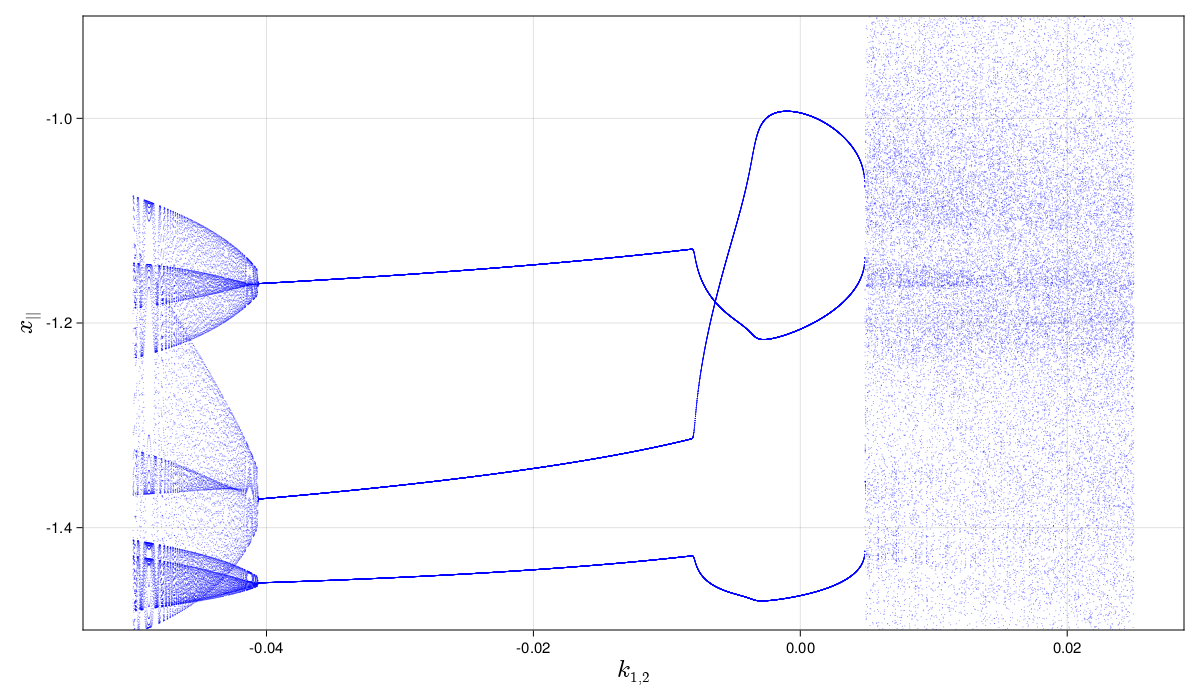

In [189]:
# length range 5000
# to -0.05
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end
ylims!(axis, -1.5, -0.9)
fig

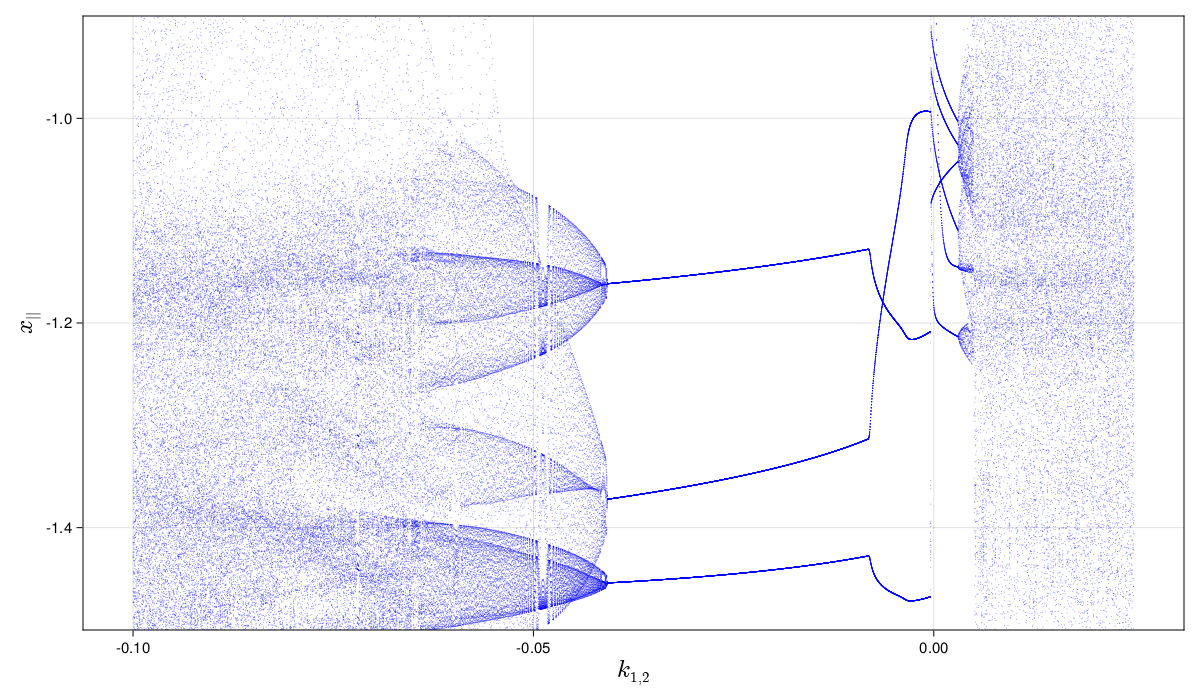

In [178]:
# length range 5000
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end
ylims!(axis, -1.5, -0.9)
fig

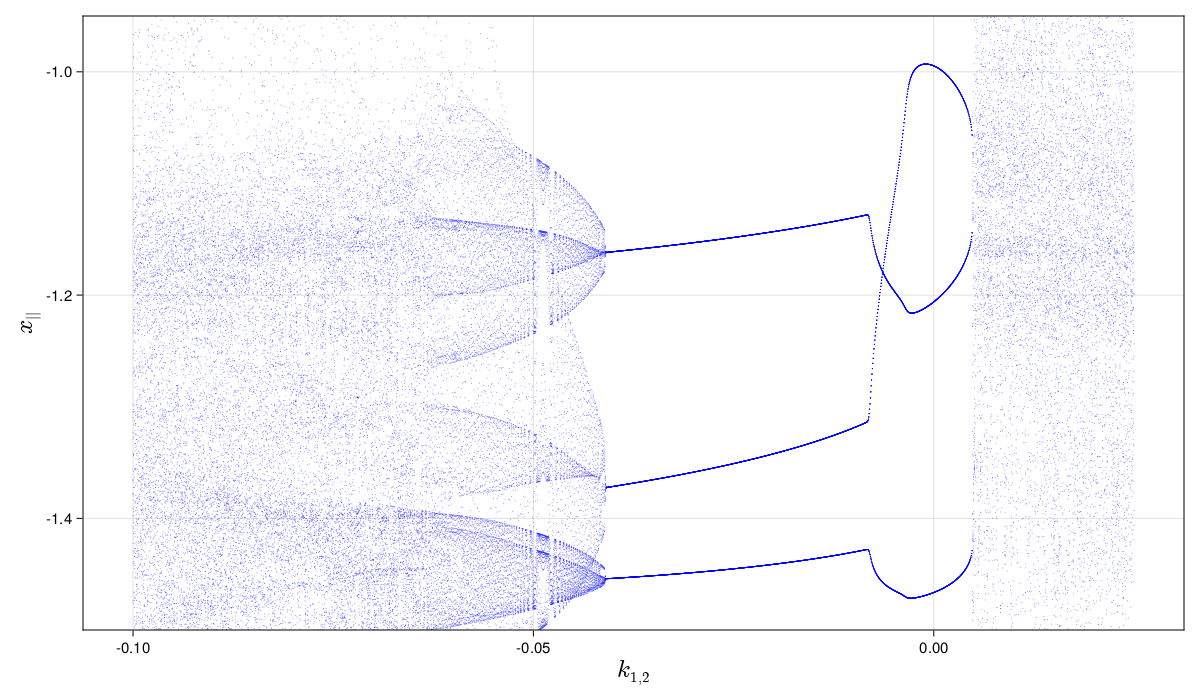

In [161]:
# length range 2500
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end
ylims!(axis, -1.5, -0.95)
fig

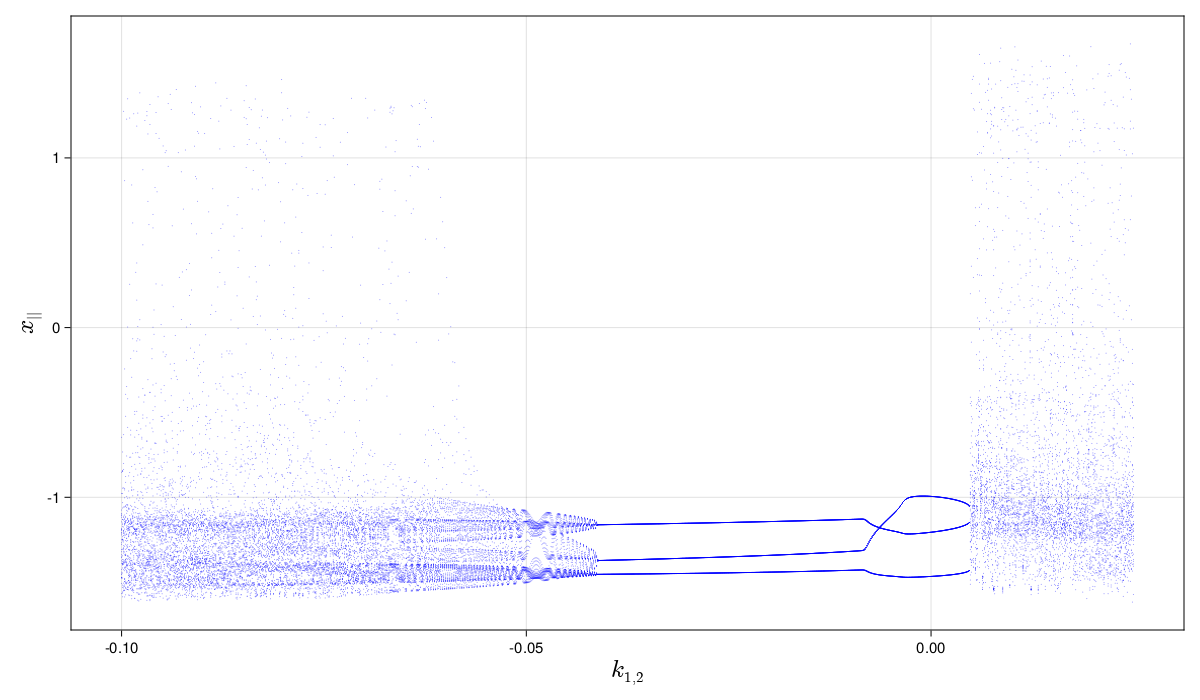

In [151]:
# length range 1000
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end

fig

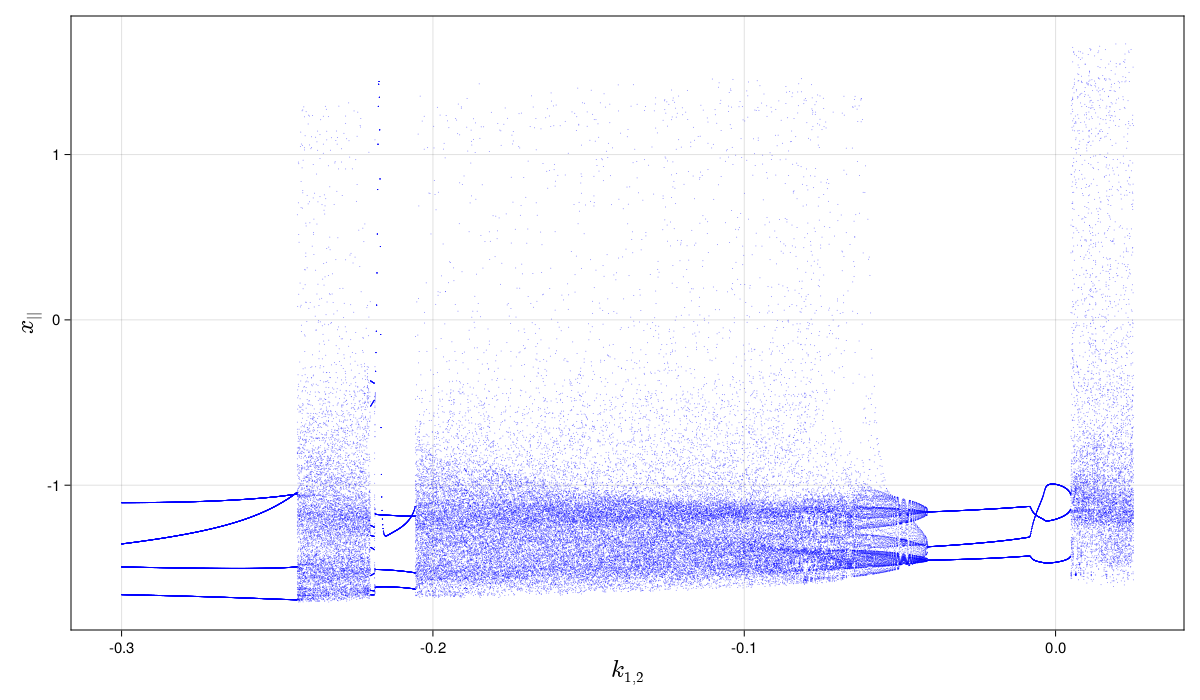

In [105]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end

fig

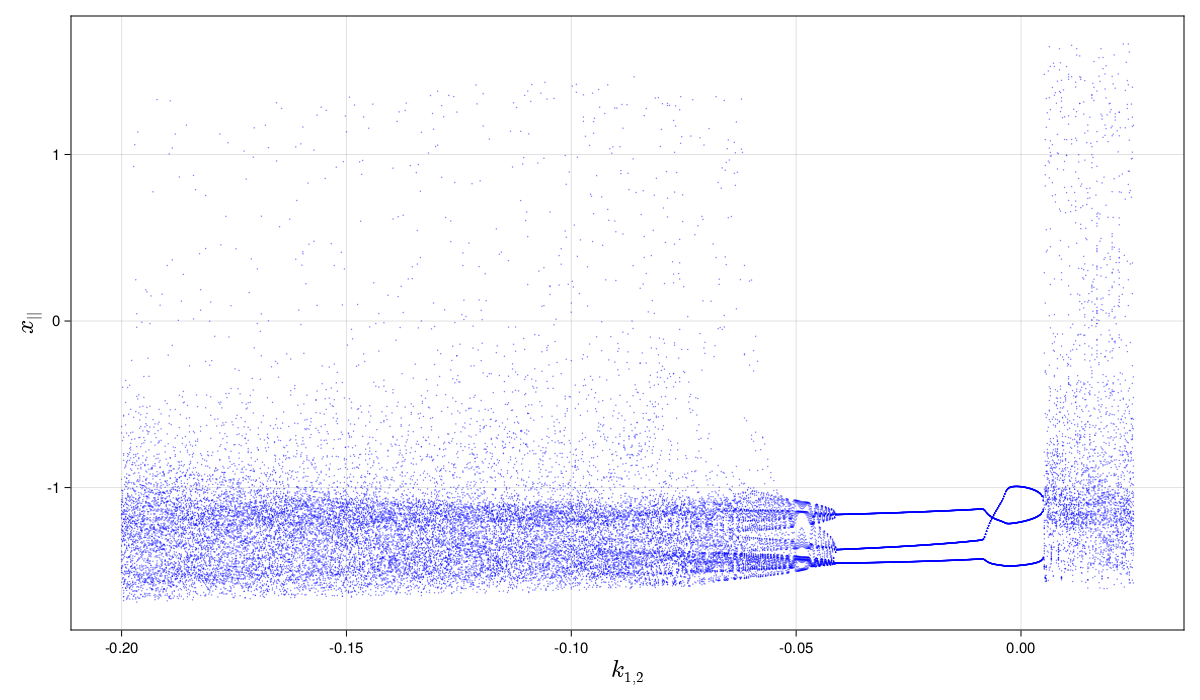

In [97]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.5)
end

fig